In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('magma')

In [206]:
df = pd.read_csv('Datasets/us_ev_parking.csv')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zip               1868 non-null   float64
 1   facility_type     1850 non-null   object 
 2   ev_slow           1834 non-null   float64
 3   ev_dc_fast_count  1834 non-null   float64
 4   spaces            254 non-null    float64
dtypes: float64(4), object(1)
memory usage: 73.1+ KB


In [208]:
df.dropna(subset=['zip'], axis = 0, inplace = True)

In [209]:
df['zip'] = df['zip'].astype(int)

In [210]:
df = df.set_index('zip', drop = True)

In [211]:
df.isnull().sum()

facility_type         18
ev_slow               34
ev_dc_fast_count      34
spaces              1615
dtype: int64

In [212]:
df.dropna(subset = ['facility_type', 'ev_slow'], axis = 0, inplace = True)

In [213]:
df.isnull().sum()

facility_type          0
ev_slow                0
ev_dc_fast_count       0
spaces              1615
dtype: int64

In [214]:
df = df.applymap(lambda x: x.lower() if type(x) == str else x)

In [215]:
df.replace(' ', '_', regex = True, inplace = True)

<AxesSubplot:>

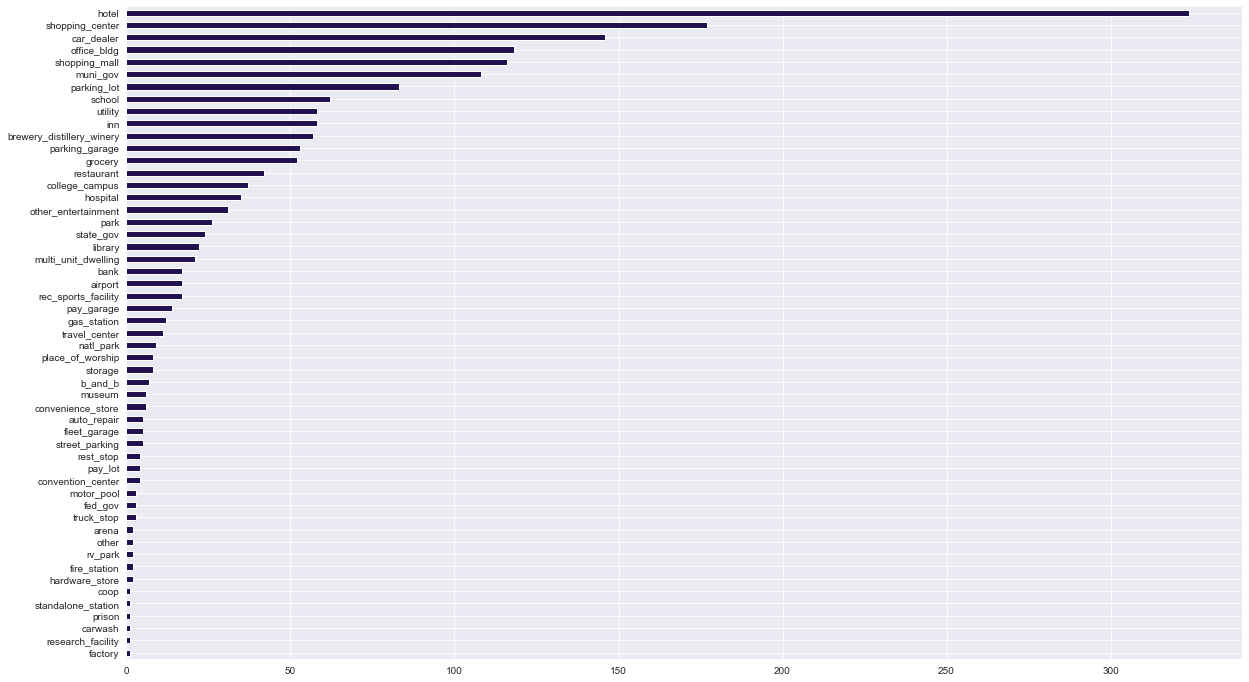

In [216]:
plt.figure(figsize = (20,12))
df['facility_type'].value_counts(ascending=True).plot(kind = 'barh')

In [217]:
df['facility_type'].unique()

array(['storage', 'street_parking', 'utility', 'college_campus', 'museum',
       'office_bldg', 'parking_garage', 'hotel', 'parking_lot',
       'pay_garage', 'bank', 'car_dealer', 'hospital', 'shopping_mall',
       'restaurant', 'muni_gov', 'multi_unit_dwelling',
       'other_entertainment', 'standalone_station', 'shopping_center',
       'state_gov', 'airport', 'grocery', 'park', 'prison', 'auto_repair',
       'rec_sports_facility', 'school', 'gas_station', 'pay_lot',
       'convenience_store', 'fleet_garage', 'library',
       'convention_center', 'hardware_store', 'natl_park', 'carwash',
       'rv_park', 'fire_station', 'arena', 'inn', 'travel_center',
       'brewery_distillery_winery', 'other', 'place_of_worship',
       'research_facility', 'motor_pool', 'rest_stop', 'factory',
       'truck_stop', 'b_and_b', 'fed_gov', 'coop'], dtype=object)

In [218]:
df.facility_type = df.facility_type.map({'storage': 'others',
                                         'street_parking': 'parking_lot',
                                         'utility': 'government',
                                         'college_campus': 'school', 
                                         'museum': 'landmarks',
                                         'office_bldg': 'office', 
                                         'parking_garage': 'parking_lot', 
                                         'hotel': 'hotel', 
                                         'parking_lot': 'parking_lot',
                                         'pay_garage': 'parking_lot', 
                                         'bank': 'office', 
                                         'car_dealer': 'car_dealer', 
                                         'hospital': 'hospital', 
                                         'shopping_mall': 'shopping_mall',
                                         'restaurant': 'restaurant', 
                                         'muni_gov': 'parking_lot', 
                                         'multi_unit_dwelling': 'parking_lot',
                                         'other_entertainment': 'others', 
                                         'standalone_station': 'gas_station', 
                                         'shopping_center': 'shopping_mall',
                                         'state_gov': 'government', 
                                         'airport': 'airport', 
                                         'grocery': 'others', 
                                         'park': 'landmarks', 
                                         'prison': 'others', 
                                         'auto_repair': 'others',
                                         'rec_sports_facility': 'others', 
                                         'school': 'school', 
                                         'gas_station': 'gas_station', 
                                         'pay_lot': 'parking_lot', 
                                         'convenience_store': 'others', 
                                         'fleet_garage': 'others', 
                                         'library': 'others',
                                         'convention_center': 'others', 
                                         'hardware_store': 'shopping_mall', 
                                         'natl_park' : 'landmarks', 
                                         'carwash': 'others',
                                         'rv_park': 'others', 
                                         'fire_station': 'others', 
                                         'arena': 'landmarks', 
                                         'inn': 'hotel', 
                                         'travel_center': 'others',
                                         'brewery_distillery_winery': 'landmarks', 
                                         'other': 'others', 
                                         'place_of_worship': 'landmarks',
                                         'research_facility': 'others', 
                                         'motor_pool': 'others', 
                                         'rest_stop': 'gas_station', 
                                         'factory': 'others',
                                         'truck_stop': 'others', 
                                         'b_and_b' : 'parking_lot', 
                                         'fed_gov': 'government', 
                                         'coop': 'others'
                                        }
                                       )

hotel            382
shopping_mall    295
parking_lot      295
others           178
car_dealer       146
office           135
landmarks        108
school            99
government        85
restaurant        42
hospital          35
gas_station       17
airport           17
Name: facility_type, dtype: int64


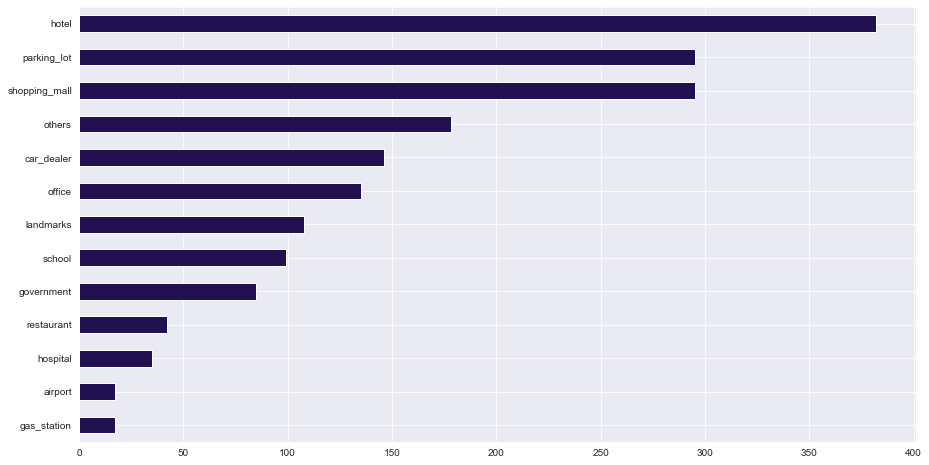

In [219]:
plt.figure(figsize = (15,8))
df['facility_type'].value_counts(ascending=True).plot(kind = 'barh')
print(df['facility_type'].value_counts())

In [220]:
df.rename(columns = {'ev_dc_fast_count': 'ev_fast'}, inplace=True)

In [221]:
df.head()

,facility_type,ev_slow,ev_fast,spaces
zip,,,,
90001,others,1.0,0.0,NaN
90002,parking_lot,1.0,0.0,NaN
90003,government,2.0,0.0,61.0
90003,government,2.0,0.0,21.0
90003,government,2.0,0.0,64.0


In [222]:
df1 = pd.get_dummies(df, columns = ['facility_type'])

In [223]:
df1.head()

,ev_slow,ev_fast,spaces,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_others,facility_type_parking_lot,facility_type_restaurant,facility_type_school,facility_type_shopping_mall
zip,,,,,,,,,,,,,,,,
90001,1.0,0.0,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0
90002,1.0,0.0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0
90003,2.0,0.0,61.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90003,2.0,0.0,21.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90003,2.0,0.0,64.0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [224]:
df1.isnull().sum()

ev_slow                           0
ev_fast                           0
spaces                         1615
facility_type_airport             0
facility_type_car_dealer          0
facility_type_gas_station         0
facility_type_government          0
facility_type_hospital            0
facility_type_hotel               0
facility_type_landmarks           0
facility_type_office              0
facility_type_others              0
facility_type_parking_lot         0
facility_type_restaurant          0
facility_type_school              0
facility_type_shopping_mall       0
dtype: int64

In [225]:
knn_imp = KNNImputer(n_neighbors = 5, weights='uniform', )
knn_imp_parking_missing = knn_imp.fit_transform(df1)

df_imputed = pd.DataFrame(knn_imp_parking_missing, columns = df1.columns)

In [226]:
df_imputed

,ev_slow,ev_fast,spaces,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_others,facility_type_parking_lot,facility_type_restaurant,facility_type_school,facility_type_shopping_mall
0,1.0,0.0,264.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,3408.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,0.0,61.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,64.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,7.0,0.0,229.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1830,1.0,0.0,201.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1831,2.0,0.0,54.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1832,3.0,0.0,4397.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
df_imputed['spaces'] = df_imputed['spaces'].apply(np.ceil)

In [228]:
df['spaces'] = df_imputed['spaces'].values

In [229]:
df.head()

,facility_type,ev_slow,ev_fast,spaces
zip,,,,
90001,others,1.0,0.0,265.0
90002,parking_lot,1.0,0.0,3409.0
90003,government,2.0,0.0,61.0
90003,government,2.0,0.0,21.0
90003,government,2.0,0.0,64.0


<AxesSubplot:xlabel='spaces'>

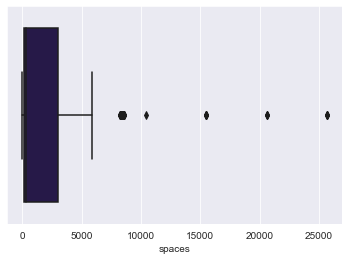

In [230]:
sns.boxplot(x = df['spaces'])

In [231]:
outlier1 = df[(df['spaces']>2000)].index

In [232]:
df = df.drop(outlier1, axis = 0)

<AxesSubplot:xlabel='spaces'>

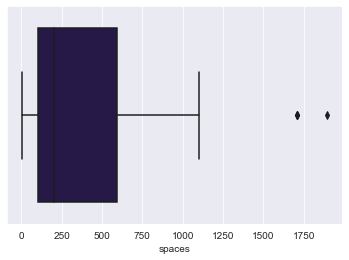

In [233]:
sns.boxplot(x = df['spaces'])

In [234]:
df.head()

,facility_type,ev_slow,ev_fast,spaces
zip,,,,
90001,others,1.0,0.0,265.0
90003,government,2.0,0.0,61.0
90003,government,2.0,0.0,21.0
90003,government,2.0,0.0,64.0
90006,government,1.0,0.0,106.0


In [235]:
df.shape

(955, 4)

In [236]:
df = pd.get_dummies(df, columns = ['facility_type'])

In [237]:
df

,ev_slow,ev_fast,spaces,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_others,facility_type_parking_lot,facility_type_restaurant,facility_type_school,facility_type_shopping_mall
zip,,,,,,,,,,,,,,,,
90001,1.0,0.0,265.0,0,0,0,0,0,0,0,0,1,0,0,0,0
90003,2.0,0.0,61.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90003,2.0,0.0,21.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90003,2.0,0.0,64.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90006,1.0,0.0,106.0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99212,2.0,1.0,222.0,0,1,0,0,0,0,0,0,0,0,0,0,0
99218,1.0,0.0,202.0,0,1,0,0,0,0,0,0,0,0,0,0,0
99252,3.0,0.0,317.0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [238]:
df['ev_total'] = df['ev_slow'] + df['ev_fast']

In [239]:
df.head()

,ev_slow,ev_fast,spaces,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_others,facility_type_parking_lot,facility_type_restaurant,facility_type_school,facility_type_shopping_mall,ev_total
zip,,,,,,,,,,,,,,,,,
90001,1.0,0.0,265.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
90003,2.0,0.0,61.0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0
90003,2.0,0.0,21.0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0
90003,2.0,0.0,64.0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0
90006,1.0,0.0,106.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0


In [240]:
features = df.drop(columns = ['ev_slow', 'ev_fast', 'ev_total'], axis = 1)

In [241]:
X_slow = features
y_slow = df['ev_slow']

In [242]:
X_train, X_test, y_train, y_test  = train_test_split(X_slow, y_slow, random_state=42)

In [243]:
lr = LinearRegression()

In [244]:
lr.fit(X_train, y_train)
lr.fit(X_test, y_test)

LinearRegression()

In [245]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.08344799849758067
0.1435843420089271


In [246]:
ridge = RidgeCV(alphas = np.linspace(0.1, 10, 100))

In [247]:
ridge.fit(X_train, y_train)
ridge.fit(X_test, y_test)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [248]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.07190637761180763
0.1288166491181406


In [249]:
pred_lr = lr.predict(X_test)

Text(0, 0.5, 'Actual Values')

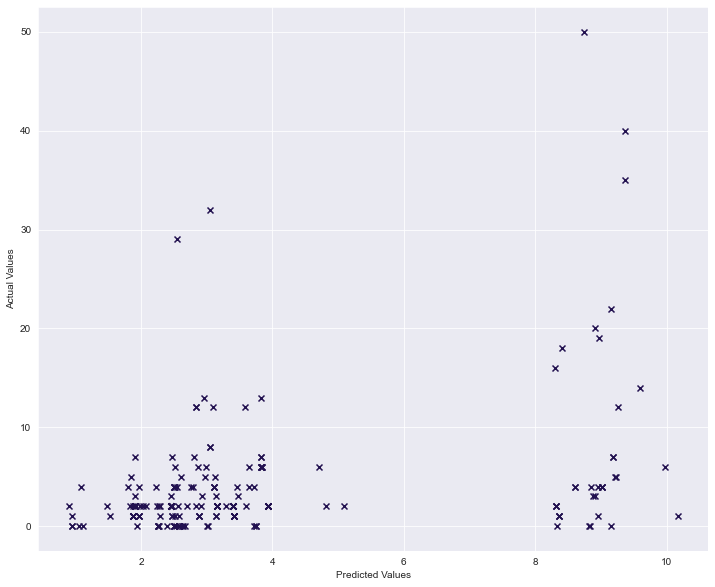

In [250]:
plt.figure(figsize = (12,10))
plt.scatter(pred_lr, y_test, marker = 'x')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [255]:
pipe = Pipeline([('ss', StandardScaler()), ('model', None)])

param_grid = [{'model': [KNeighborsClassifier()],
               'model__p': range(1,5),
               'model__n_neighbors': [3,5,7,9],
               'model__weights': ['uniform', 'distance']},
              {'model': [RandomForestClassifier()],
               'model__n_estimators': [5,10,15],
               'model__max_depth': [6,7,8],
               'model__min_samples_split': [2,3,4]}]


In [256]:
gs = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')

In [257]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('model', None)]),
             param_grid=[{'model': [KNeighborsClassifier(n_neighbors=9, p=1,
                                                         weights='distance')],
                          'model__n_neighbors': [3, 5, 7, 9],
                          'model__p': range(1, 5),
                          'model__weights': ['uniform', 'distance']},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [6, 7, 8],
                          'model__min_samples_split': [2, 3, 4],
                          'model__n_estimators': [5, 10, 15]}],
             scoring='accuracy')